In [1]:
from dataset import load_CIFAR10
from train import train
from model import ThreeLayerNet
from matplotlib import pyplot as plt

# 加载 CIFAR-10 数据
data_dir = './cifar-10-batches-py'
X, y, X_test, y_test = load_CIFAR10(data_dir)

# 数据归一化：将像素值缩放到 [0,1]
X = X.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 划分验证集：取前 5000 个样本作为验证集，剩余作为训练集
num_val = 5000
X_val = X[:num_val]
y_val = y[:num_val]
X_train = X[num_val:]
y_train = y[num_val:]

# 定义输入、输出的维度
D = 32 * 32 * 3    # 3072，即每张 32x32 的彩色图像展平后的向量长度
num_classes = 10   # CIFAR-10 共10类

# 参数设置
hidden_size = 192
num_iters = 2000
batch_size = 100
reg = 5e-6
learning_rate = 1e-1
learning_rate_decay = 0.95

Training with activation function: relu
Training with activation function: sigmoid
Training with activation function: tanh
Training with activation function: leaky_relu


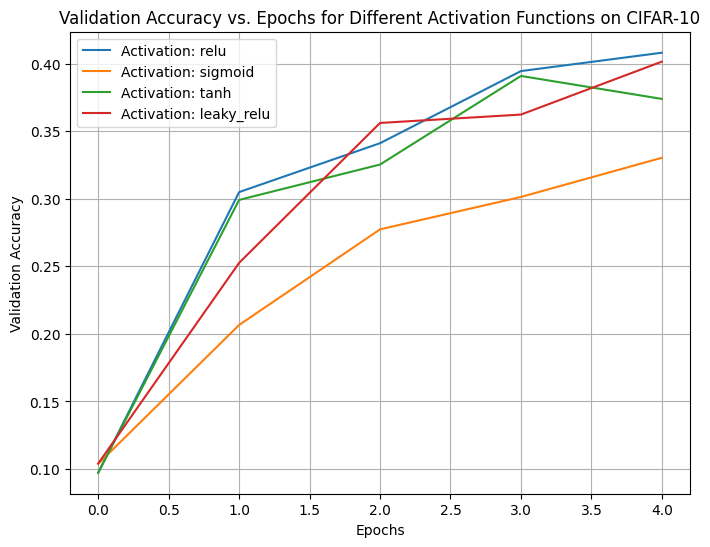

In [2]:
# 定义要测试的激活函数
activation_functions = ['relu', 'sigmoid', 'tanh', 'leaky_relu']
acc_histories = {}

# 针对不同激活函数进行训练
for act in activation_functions:
    print("Training with activation function:", act)
    net = ThreeLayerNet(D, hidden_size, num_classes, activation=act)
    stats = train(net, X_train, y_train, X_val, y_val,
                  learning_rate=learning_rate,
                  learning_rate_decay=learning_rate_decay,
                  reg=reg,
                  num_iters=num_iters,
                  batch_size=batch_size,
                  verbose=False)
    # 存储验证准确率随 epoch 变化的历史记录
    acc_histories[act] = stats['val_acc_history']

# 绘制不同激活函数下的验证准确率变化曲线
plt.figure(figsize=(8,6))
for act in activation_functions:
    plt.plot(acc_histories[act], label=f"Activation: {act}")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs. Epochs for Different Activation Functions on CIFAR-10")
plt.legend()
plt.grid(True)
plt.show()
